In [1]:
import pandas as pd

In [2]:
confirmed_cases=pd.read_csv(r"time_series_covid19_confirmed_global.csv")
death_reported=pd.read_csv(r"time_series_covid19_deaths_global.csv")
recovred_cases=pd.read_csv(r"time_series_covid19_recovered_global.csv")

In [3]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,48718,48952,49161,49378,49621,49681,49817,50013,50190,50433
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,49191,50000,50637,51424,52004,52542,53003,53425,53814,54317
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,92597,93065,93507,93933,94371,94781,95203,95659,96069,96549
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,7382,7382,7446,7466,7519,7560,7577,7602,7633,7669
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,16277,16362,16407,16484,16562,16626,16644,16686,16802,16931


In [4]:
death_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1969,1995,2011,2025,2030,2047,2067,2082,2096,2117
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,1016,1028,1040,1055,1066,1074,1088,1098,1111,1117
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2609,2623,2631,2640,2647,2659,2666,2675,2687,2696
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,79,79,79,79,80,80,81,81,82,82
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,372,372,379,382,384,386,387,390,393,393


In [5]:
recovred_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38252,38336,38475,38505,38540,38613,39006,39508,39585,39692
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,24820,25876,26381,26898,27426,27831,28121,28752,29249,29799
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,60888,61307,61700,62089,62487,62869,63260,63644,64020,64401
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,6706,6706,6819,6875,6919,6963,6997,7028,7073,7106
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,8924,8990,9194,9266,9345,9518,9592,9695,9729,9729


In [6]:
confirmed_cases.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '12/14/20', '12/15/20', '12/16/20', '12/17/20', '12/18/20', '12/19/20',
       '12/20/20', '12/21/20', '12/22/20', '12/23/20'],
      dtype='object', length=341)

In [7]:
date_list = confirmed_cases.columns.tolist()[5:]
date_list[0], date_list[-1]

('1/23/20', '12/23/20')

In [8]:
new_cases_confirmed_df = confirmed_cases[date_list].T
cases_list=list(new_cases_confirmed_df)
new_cases_confirmed_df["confirmed"] = new_cases_confirmed_df[cases_list].sum(axis=1)
new_cases_confirmed_df = new_cases_confirmed_df.assign(days=[1 + i for i in range(len(new_cases_confirmed_df))])[['days'] + 
    new_cases_confirmed_df.columns.tolist()]
confirmed=new_cases_confirmed_df.reset_index()['confirmed']
confirmed

0           654
1           941
2          1434
3          2118
4          2927
         ...   
331    76289042
332    76823486
333    77364641
334    78011432
335    78704434
Name: confirmed, Length: 336, dtype: int64

In [9]:
new_death_df = death_reported[date_list].T
death_list=list(new_death_df)
new_death_df["deaths"] = new_death_df[death_list].sum(axis=1)
new_death_df = new_death_df.assign(days=[1 + i for i in range(len(new_death_df))])[['days'] + 
    new_death_df.columns.tolist()]
deaths=new_death_df.reset_index()['deaths']
deaths

0           18
1           26
2           42
3           56
4           82
        ...   
331    1685526
332    1693205
333    1702596
334    1717055
335    1730663
Name: deaths, Length: 336, dtype: int64

In [13]:
new_recovred_df = recovred_cases[date_list].T
recovred_list=list(new_recovred_df )
new_recovred_df['recovred'] = new_recovred_df [recovred_list].sum(axis=1)
new_recovred_df  = new_recovred_df.assign(days=[1 + i for i in range(len(new_recovred_df))])[['days'] + 
    new_recovred_df.columns.tolist()]
recovred=new_recovred_df.reset_index()['recovred']
recovred

0            30
1            36
2            39
3            52
4            61
         ...   
331    43093742
332    43367172
333    43707973
334    44069203
335    44393791
Name: recovred, Length: 336, dtype: int64

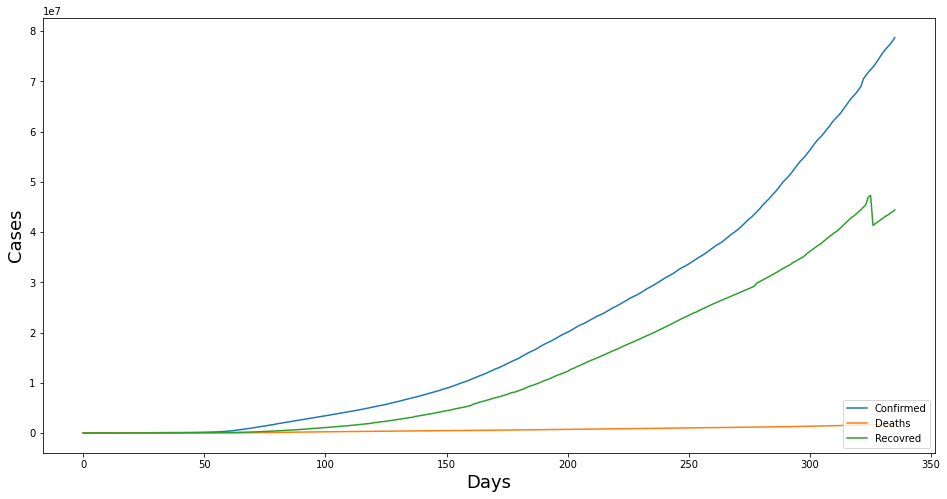

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.xlabel('Days',fontsize=18)
plt.ylabel('Cases',fontsize=18)
plt.plot(confirmed)
plt.plot(deaths)
plt.plot(recovred)
plt.legend(['Confirmed','Deaths','Recovred'],loc='lower right')
plt.show()

In [15]:
import numpy as np

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,0.3))
confirmed=scaler.fit_transform(np.array(confirmed).reshape(-1,1))
deaths=scaler.fit_transform(np.array(deaths).reshape(-1,1))
recovred=scaler.fit_transform(np.array(recovred).reshape(-1,1))

In [17]:
print(confirmed)

[[0.00000000e+00]
 [1.09397541e-06]
 [2.97317359e-06]
 [5.58041812e-06]
 [8.66413278e-06]
 [1.87691112e-05]
 [2.10142385e-05]
 [2.88969602e-05]
 [3.53464599e-05]
 [4.33930873e-05]
 [6.14951404e-05]
 [7.33115995e-05]
 [8.86005729e-05]
 [1.02875618e-04]
 [1.14920783e-04]
 [1.28616440e-04]
 [1.39037795e-04]
 [1.50587430e-04]
 [1.60532315e-04]
 [1.68315931e-04]
 [1.69909247e-04]
 [2.27668862e-04]
 [2.52548226e-04]
 [2.60713018e-04]
 [2.69037904e-04]
 [2.76794838e-04]
 [2.83968572e-04]
 [2.85874452e-04]
 [2.88009038e-04]
 [2.90406636e-04]
 [2.97119147e-04]
 [2.98567616e-04]
 [3.00717450e-04]
 [3.03968882e-04]
 [3.07692972e-04]
 [3.12876967e-04]
 [3.18163880e-04]
 [3.25368108e-04]
 [3.34443911e-04]
 [3.42002633e-04]
 [3.51890341e-04]
 [3.60687886e-04]
 [3.71402746e-04]
 [3.86318167e-04]
 [4.01927328e-04]
 [4.16979972e-04]
 [4.32882639e-04]
 [4.51262951e-04]
 [4.80464852e-04]
 [5.02534948e-04]
 [5.57374754e-04]
 [5.99582383e-04]
 [6.42540930e-04]
 [6.98993111e-04]
 [7.59767828e-04]
 [8.343220

In [18]:
print(deaths)

[[0.00000000e+00]
 [1.38676621e-06]
 [4.16029862e-06]
 [6.58713948e-06]
 [1.10941296e-05]
 [1.95880727e-05]
 [1.99347642e-05]
 [2.65219037e-05]
 [3.38024263e-05]
 [4.17763319e-05]
 [5.96309468e-05]
 [7.07250765e-05]
 [8.21658977e-05]
 [9.46467935e-05]
 [1.06780998e-04]
 [1.21515389e-04]
 [1.36596471e-04]
 [1.53931049e-04]
 [1.72479047e-04]
 [1.89813624e-04]
 [1.90680353e-04]
 [2.34536835e-04]
 [2.60885392e-04]
 [2.85673838e-04]
 [3.03701799e-04]
 [3.20689685e-04]
 [3.44958094e-04]
 [3.64892858e-04]
 [3.86561080e-04]
 [3.87254463e-04]
 [4.23137039e-04]
 [4.25043842e-04]
 [4.52779166e-04]
 [4.66646828e-04]
 [4.77220921e-04]
 [4.84674789e-04]
 [4.94902190e-04]
 [5.06863048e-04]
 [5.16223720e-04]
 [5.31651494e-04]
 [5.44652427e-04]
 [5.61120276e-04]
 [5.77414779e-04]
 [5.96656160e-04]
 [6.14684121e-04]
 [6.56113761e-04]
 [6.89049458e-04]
 [7.36546201e-04]
 [7.96177148e-04]
 [8.49220955e-04]
 [9.35373806e-04]
 [1.00817903e-03]
 [1.11929367e-03]
 [1.23682211e-03]
 [1.37757888e-03]
 [1.534110

In [19]:
print(recovred)

[[0.00000000e+00]
 [3.80388906e-08]
 [5.70583359e-08]
 [1.39475932e-07]
 [1.96534268e-07]
 [4.88165763e-07]
 [6.08622250e-07]
 [7.16399107e-07]
 [1.21724450e-06]
 [1.61031304e-06]
 [2.80219828e-06]
 [3.75951036e-06]
 [5.21132802e-06]
 [6.93575772e-06]
 [9.23711061e-06]
 [1.25591737e-05]
 [1.63947619e-05]
 [2.03761657e-05]
 [2.48267159e-05]
 [2.94991597e-05]
 [3.24598533e-05]
 [3.97189416e-05]
 [5.08960357e-05]
 [5.93723684e-05]
 [6.86918967e-05]
 [7.95836990e-05]
 [9.07988319e-05]
 [1.02013965e-04]
 [1.15048625e-04]
 [1.19568913e-04]
 [1.44902814e-04]
 [1.48123440e-04]
 [1.59744321e-04]
 [1.76722346e-04]
 [1.92438748e-04]
 [2.10773493e-04]
 [2.32544418e-04]
 [2.52013990e-04]
 [2.70615008e-04]
 [2.88911714e-04]
 [3.05560069e-04]
 [3.24211805e-04]
 [3.40860159e-04]
 [3.53970897e-04]
 [3.69782396e-04]
 [3.84585864e-04]
 [3.95991191e-04]
 [4.08093898e-04]
 [4.24564738e-04]
 [4.32945973e-04]
 [4.45169137e-04]
 [4.60200839e-04]
 [4.81819608e-04]
 [4.94841588e-04]
 [5.12257060e-04]
 [5.280178

In [20]:
training_size_c=int(len(confirmed)*0.65)
training_size_d=int(len(deaths)*0.65)
training_size_r=int(len(recovred)*0.65)
test_size_c=len(confirmed)-training_size_c
test_size_d=len(deaths)-training_size_d
test_size_r=len(recovred)-training_size_r
train_data_c,test_data_c=confirmed[0:training_size_c,:],confirmed[training_size_c:len(confirmed),:1]
train_data_d,test_data_d=deaths[0:training_size_d,:],deaths[training_size_d:len(deaths),:1]
train_data_r,test_data_r=recovred[0:training_size_r,:],recovred[training_size_r:len(recovred),:1]

In [21]:
training_size_c,test_size_c

(218, 118)

In [22]:
training_size_d,test_size_d

(218, 118)

In [23]:
training_size_r,test_size_r

(218, 118)

In [24]:
train_data_c

array([[0.00000000e+00],
       [1.09397541e-06],
       [2.97317359e-06],
       [5.58041812e-06],
       [8.66413278e-06],
       [1.87691112e-05],
       [2.10142385e-05],
       [2.88969602e-05],
       [3.53464599e-05],
       [4.33930873e-05],
       [6.14951404e-05],
       [7.33115995e-05],
       [8.86005729e-05],
       [1.02875618e-04],
       [1.14920783e-04],
       [1.28616440e-04],
       [1.39037795e-04],
       [1.50587430e-04],
       [1.60532315e-04],
       [1.68315931e-04],
       [1.69909247e-04],
       [2.27668862e-04],
       [2.52548226e-04],
       [2.60713018e-04],
       [2.69037904e-04],
       [2.76794838e-04],
       [2.83968572e-04],
       [2.85874452e-04],
       [2.88009038e-04],
       [2.90406636e-04],
       [2.97119147e-04],
       [2.98567616e-04],
       [3.00717450e-04],
       [3.03968882e-04],
       [3.07692972e-04],
       [3.12876967e-04],
       [3.18163880e-04],
       [3.25368108e-04],
       [3.34443911e-04],
       [3.42002633e-04],


In [25]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]  
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [26]:
time_step = 2
X_train_c, y_train_c = create_dataset(train_data_c, time_step)
X_train_d, y_train_d = create_dataset(train_data_d, time_step)
X_train_r, y_train_r = create_dataset(train_data_r, time_step)
X_test_c, ytest_c = create_dataset(test_data_c, time_step)
X_test_d, ytest_d = create_dataset(test_data_d, time_step)
X_test_r, ytest_r = create_dataset(test_data_r, time_step)

In [27]:
print(X_train_c),print(y_train_c)

[[0.00000000e+00 1.09397541e-06]
 [1.09397541e-06 2.97317359e-06]
 [2.97317359e-06 5.58041812e-06]
 [5.58041812e-06 8.66413278e-06]
 [8.66413278e-06 1.87691112e-05]
 [1.87691112e-05 2.10142385e-05]
 [2.10142385e-05 2.88969602e-05]
 [2.88969602e-05 3.53464599e-05]
 [3.53464599e-05 4.33930873e-05]
 [4.33930873e-05 6.14951404e-05]
 [6.14951404e-05 7.33115995e-05]
 [7.33115995e-05 8.86005729e-05]
 [8.86005729e-05 1.02875618e-04]
 [1.02875618e-04 1.14920783e-04]
 [1.14920783e-04 1.28616440e-04]
 [1.28616440e-04 1.39037795e-04]
 [1.39037795e-04 1.50587430e-04]
 [1.50587430e-04 1.60532315e-04]
 [1.60532315e-04 1.68315931e-04]
 [1.68315931e-04 1.69909247e-04]
 [1.69909247e-04 2.27668862e-04]
 [2.27668862e-04 2.52548226e-04]
 [2.52548226e-04 2.60713018e-04]
 [2.60713018e-04 2.69037904e-04]
 [2.69037904e-04 2.76794838e-04]
 [2.76794838e-04 2.83968572e-04]
 [2.83968572e-04 2.85874452e-04]
 [2.85874452e-04 2.88009038e-04]
 [2.88009038e-04 2.90406636e-04]
 [2.90406636e-04 2.97119147e-04]
 [2.971191

(None, None)

In [28]:
print(X_train_d),print(y_train_d)

[[0.00000000e+00 1.38676621e-06]
 [1.38676621e-06 4.16029862e-06]
 [4.16029862e-06 6.58713948e-06]
 [6.58713948e-06 1.10941296e-05]
 [1.10941296e-05 1.95880727e-05]
 [1.95880727e-05 1.99347642e-05]
 [1.99347642e-05 2.65219037e-05]
 [2.65219037e-05 3.38024263e-05]
 [3.38024263e-05 4.17763319e-05]
 [4.17763319e-05 5.96309468e-05]
 [5.96309468e-05 7.07250765e-05]
 [7.07250765e-05 8.21658977e-05]
 [8.21658977e-05 9.46467935e-05]
 [9.46467935e-05 1.06780998e-04]
 [1.06780998e-04 1.21515389e-04]
 [1.21515389e-04 1.36596471e-04]
 [1.36596471e-04 1.53931049e-04]
 [1.53931049e-04 1.72479047e-04]
 [1.72479047e-04 1.89813624e-04]
 [1.89813624e-04 1.90680353e-04]
 [1.90680353e-04 2.34536835e-04]
 [2.34536835e-04 2.60885392e-04]
 [2.60885392e-04 2.85673838e-04]
 [2.85673838e-04 3.03701799e-04]
 [3.03701799e-04 3.20689685e-04]
 [3.20689685e-04 3.44958094e-04]
 [3.44958094e-04 3.64892858e-04]
 [3.64892858e-04 3.86561080e-04]
 [3.86561080e-04 3.87254463e-04]
 [3.87254463e-04 4.23137039e-04]
 [4.231370

(None, None)

In [29]:
print(X_train_r),print(y_train_r)

[[0.00000000e+00 3.80388906e-08]
 [3.80388906e-08 5.70583359e-08]
 [5.70583359e-08 1.39475932e-07]
 [1.39475932e-07 1.96534268e-07]
 [1.96534268e-07 4.88165763e-07]
 [4.88165763e-07 6.08622250e-07]
 [6.08622250e-07 7.16399107e-07]
 [7.16399107e-07 1.21724450e-06]
 [1.21724450e-06 1.61031304e-06]
 [1.61031304e-06 2.80219828e-06]
 [2.80219828e-06 3.75951036e-06]
 [3.75951036e-06 5.21132802e-06]
 [5.21132802e-06 6.93575772e-06]
 [6.93575772e-06 9.23711061e-06]
 [9.23711061e-06 1.25591737e-05]
 [1.25591737e-05 1.63947619e-05]
 [1.63947619e-05 2.03761657e-05]
 [2.03761657e-05 2.48267159e-05]
 [2.48267159e-05 2.94991597e-05]
 [2.94991597e-05 3.24598533e-05]
 [3.24598533e-05 3.97189416e-05]
 [3.97189416e-05 5.08960357e-05]
 [5.08960357e-05 5.93723684e-05]
 [5.93723684e-05 6.86918967e-05]
 [6.86918967e-05 7.95836990e-05]
 [7.95836990e-05 9.07988319e-05]
 [9.07988319e-05 1.02013965e-04]
 [1.02013965e-04 1.15048625e-04]
 [1.15048625e-04 1.19568913e-04]
 [1.19568913e-04 1.44902814e-04]
 [1.449028

(None, None)

In [30]:
print(X_test_c),print(ytest_c)

[[0.09433465 0.09535037]
 [0.09535037 0.09619377]
 [0.09619377 0.09719481]
 [0.09719481 0.09820456]
 [0.09820456 0.09928551]
 [0.09928551 0.10035669]
 [0.10035669 0.10155289]
 [0.10155289 0.10258193]
 [0.10258193 0.10346146]
 [0.10346146 0.10429139]
 [0.10429139 0.10521347]
 [0.10521347 0.10629871]
 [0.10629871 0.1074424 ]
 [0.1074424  0.10866573]
 [0.10866573 0.10975742]
 [0.10975742 0.11068253]
 [0.11068253 0.11168575]
 [0.11168575 0.11277371]
 [0.11277371 0.11393264]
 [0.11393264 0.11513218]
 [0.11513218 0.1163733 ]
 [0.1163733  0.11748734]
 [0.11748734 0.11844823]
 [0.11844823 0.11949934]
 [0.11949934 0.12058273]
 [0.12058273 0.12163268]
 [0.12163268 0.12297502]
 [0.12297502 0.12423404]
 [0.12423404 0.12533166]
 [0.12533166 0.12628994]
 [0.12628994 0.12725749]
 [0.12725749 0.12833256]
 [0.12833256 0.12958336]
 [0.12958336 0.13079597]
 [0.13079597 0.13192896]
 [0.13192896 0.13319478]
 [0.13319478 0.13419248]
 [0.13419248 0.1353376 ]
 [0.1353376  0.13658068]
 [0.13658068 0.13791787]


(None, None)

In [31]:
print(X_test_d),print(ytest_d)

[[0.14518107 0.14609443]
 [0.14609443 0.14679371]
 [0.14679371 0.14752488]
 [0.14752488 0.14864071]
 [0.14864071 0.1496943 ]
 [0.1496943  0.15068324]
 [0.15068324 0.15170148]
 [0.15170148 0.15255954]
 [0.15255954 0.15321634]
 [0.15321634 0.15483851]
 [0.15483851 0.15568982]
 [0.15568982 0.15674705]
 [0.15674705 0.1577528 ]
 [0.1577528  0.15877225]
 [0.15877225 0.15962164]
 [0.15962164 0.160258  ]
 [0.160258   0.16102349]
 [0.16102349 0.16215405]
 [0.16215405 0.1631605 ]
 [0.1631605  0.16410887]
 [0.16410887 0.16509521]
 [0.16509521 0.16600718]
 [0.16600718 0.1666529 ]
 [0.1666529  0.16736275]
 [0.16736275 0.16839519]
 [0.16839519 0.16937182]
 [0.16937182 0.17052821]
 [0.17052821 0.1715487 ]
 [0.1715487  0.17247263]
 [0.17247263 0.17310725]
 [0.17310725 0.17379058]
 [0.17379058 0.17482407]
 [0.17482407 0.17593834]
 [0.17593834 0.17744644]
 [0.17744644 0.17831369]
 [0.17831369 0.17924404]
 [0.17924404 0.17990483]
 [0.17990483 0.18110439]
 [0.18110439 0.18210823]
 [0.18210823 0.18311918]


(None, None)

In [32]:
print(X_test_r),print(ytest_r)

[[0.10272932 0.10406967]
 [0.10406967 0.10540249]
 [0.10540249 0.1066755 ]
 [0.1066755  0.1083107 ]
 [0.1083107  0.10970062]
 [0.10970062 0.11110397]
 [0.11110397 0.11245754]
 [0.11245754 0.1137319 ]
 [0.1137319  0.11507445]
 [0.11507445 0.11632669]
 [0.11632669 0.11760618]
 [0.11760618 0.11912942]
 [0.11912942 0.12050279]
 [0.12050279 0.12192073]
 [0.12192073 0.12333407]
 [0.12333407 0.1245249 ]
 [0.1245249  0.12597334]
 [0.12597334 0.12740789]
 [0.12740789 0.12886276]
 [0.12886276 0.13025871]
 [0.13025871 0.13185089]
 [0.13185089 0.13335329]
 [0.13335329 0.13485613]
 [0.13485613 0.1364122 ]
 [0.1364122  0.13780372]
 [0.13780372 0.13947372]
 [0.13947372 0.14109445]
 [0.14109445 0.14261104]
 [0.14261104 0.14427302]
 [0.14427302 0.14562883]
 [0.14562883 0.14703955]
 [0.14703955 0.14856927]
 [0.14856927 0.1501428 ]
 [0.1501428  0.15154737]
 [0.15154737 0.15263974]
 [0.15263974 0.15426027]
 [0.15426027 0.15566854]
 [0.15566854 0.15717384]
 [0.15717384 0.15864869]
 [0.15864869 0.16026656]


(None, None)

In [33]:
print(X_train_c.shape), print(y_train_c.shape)

(215, 2)
(215,)


(None, None)

In [34]:
print(X_test_c.shape), print(ytest_c.shape)

(115, 2)
(115,)


(None, None)

In [35]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train_c =X_train_c.reshape(X_train_c.shape[0],X_train_c.shape[1] , 1)
X_train_d =X_train_d.reshape(X_train_d.shape[0],X_train_d.shape[1] , 1)
X_train_r =X_train_r.reshape(X_train_r.shape[0],X_train_r.shape[1] , 1)
X_test_c = X_test_c.reshape(X_test_c.shape[0],X_test_c.shape[1] , 1)
X_test_d = X_test_d.reshape(X_test_d.shape[0],X_test_d.shape[1] , 1)
X_test_r = X_test_r.reshape(X_test_r.shape[0],X_test_r.shape[1] , 1)

In [36]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [37]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(2,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 2, 50)             10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 2, 50)             20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.fit(X_train_c,y_train_c,validation_data=(X_test_c,ytest_c),epochs=300,batch_size=64,verbose=1)

Epoch 1/300
4/4 [==============================] - 3s 718ms/step - loss: 0.0012 - val_loss: 0.0286
Epoch 2/300
4/4 [==============================] - 0s 18ms/step - loss: 7.1869e-04 - val_loss: 0.0241
Epoch 3/300
4/4 [==============================] - 0s 16ms/step - loss: 8.0912e-04 - val_loss: 0.0235
Epoch 4/300
4/4 [==============================] - 0s 16ms/step - loss: 7.8152e-04 - val_loss: 0.0252
Epoch 5/300
4/4 [==============================] - 0s 17ms/step - loss: 7.2134e-04 - val_loss: 0.0272
Epoch 6/300
4/4 [==============================] - 0s 14ms/step - loss: 7.3486e-04 - val_loss: 0.0276
Epoch 7/300
4/4 [==============================] - 0s 14ms/step - loss: 7.3374e-04 - val_loss: 0.0264
Epoch 8/300
4/4 [==============================] - 0s 14ms/step - loss: 7.1517e-04 - val_loss: 0.0247
Epoch 9/300
4/4 [==============================] - 0s 15ms/step - loss: 7.0507e-04 - val_loss: 0.0244
Epoch 10/300
4/4 [==============================] - 0s 15ms/step - loss: 6.8948e-04 -

4/4 [==============================] - 0s 11ms/step - loss: 4.6438e-08 - val_loss: 1.3357e-06
Epoch 155/300
4/4 [==============================] - 0s 11ms/step - loss: 5.1731e-08 - val_loss: 1.4220e-06
Epoch 156/300
4/4 [==============================] - 0s 11ms/step - loss: 4.6510e-08 - val_loss: 1.5374e-06
Epoch 157/300
4/4 [==============================] - 0s 12ms/step - loss: 4.5723e-08 - val_loss: 1.3924e-06
Epoch 158/300
4/4 [==============================] - 0s 10ms/step - loss: 4.9308e-08 - val_loss: 1.4012e-06
Epoch 159/300
4/4 [==============================] - 0s 10ms/step - loss: 4.5212e-08 - val_loss: 1.4555e-06
Epoch 160/300
4/4 [==============================] - 0s 11ms/step - loss: 4.8216e-08 - val_loss: 1.9716e-06
Epoch 161/300
4/4 [==============================] - 0s 10ms/step - loss: 5.4354e-08 - val_loss: 1.8948e-06
Epoch 162/300
4/4 [==============================] - 0s 11ms/step - loss: 5.8444e-08 - val_loss: 2.1095e-06
Epoch 163/300
4/4 [=======================

Epoch 230/300
4/4 [==============================] - 0s 10ms/step - loss: 1.2733e-07 - val_loss: 5.5073e-07
Epoch 231/300
4/4 [==============================] - 0s 10ms/step - loss: 8.6263e-08 - val_loss: 1.8702e-06
Epoch 232/300
4/4 [==============================] - 0s 11ms/step - loss: 1.4122e-07 - val_loss: 1.4800e-06
Epoch 233/300
4/4 [==============================] - 0s 11ms/step - loss: 8.2043e-08 - val_loss: 7.2334e-07
Epoch 234/300
4/4 [==============================] - 0s 11ms/step - loss: 8.8527e-08 - val_loss: 7.6234e-07
Epoch 235/300
4/4 [==============================] - 0s 10ms/step - loss: 6.4922e-08 - val_loss: 9.7743e-07
Epoch 236/300
4/4 [==============================] - 0s 11ms/step - loss: 7.9824e-08 - val_loss: 8.1285e-07
Epoch 237/300
4/4 [==============================] - 0s 11ms/step - loss: 5.3168e-08 - val_loss: 6.4543e-07
Epoch 238/300
4/4 [==============================] - 0s 10ms/step - loss: 5.1635e-08 - val_loss: 4.5360e-07
Epoch 239/300
4/4 [=========

In [40]:
model.fit(X_train_d,y_train_d,validation_data=(X_test_d,ytest_d),epochs=300,batch_size=64,verbose=1)

Epoch 1/300
4/4 [==============================] - 0s 53ms/step - loss: 7.5184e-07 - val_loss: 6.1566e-06
Epoch 2/300
4/4 [==============================] - 0s 24ms/step - loss: 1.0753e-06 - val_loss: 8.8800e-07
Epoch 3/300
4/4 [==============================] - 0s 24ms/step - loss: 7.2504e-07 - val_loss: 1.0319e-06
Epoch 4/300
4/4 [==============================] - 0s 23ms/step - loss: 7.7768e-07 - val_loss: 2.8641e-06
Epoch 5/300
4/4 [==============================] - 0s 23ms/step - loss: 8.8850e-07 - val_loss: 1.5022e-06
Epoch 6/300
4/4 [==============================] - 0s 25ms/step - loss: 9.5574e-07 - val_loss: 5.8091e-07
Epoch 7/300
4/4 [==============================] - 0s 21ms/step - loss: 6.1911e-07 - val_loss: 1.1132e-06
Epoch 8/300
4/4 [==============================] - 0s 21ms/step - loss: 4.0384e-07 - val_loss: 1.3040e-06
Epoch 9/300
4/4 [==============================] - 0s 20ms/step - loss: 4.1275e-07 - val_loss: 7.3325e-07
Epoch 10/300
4/4 [============================

4/4 [==============================] - 0s 11ms/step - loss: 3.3370e-07 - val_loss: 9.8848e-06
Epoch 154/300
4/4 [==============================] - 0s 12ms/step - loss: 3.4658e-07 - val_loss: 8.0849e-06
Epoch 155/300
4/4 [==============================] - 0s 13ms/step - loss: 3.8170e-07 - val_loss: 4.9928e-06
Epoch 156/300
4/4 [==============================] - 0s 11ms/step - loss: 4.1490e-07 - val_loss: 6.7288e-06
Epoch 157/300
4/4 [==============================] - 0s 12ms/step - loss: 4.2526e-07 - val_loss: 7.6031e-06
Epoch 158/300
4/4 [==============================] - 0s 14ms/step - loss: 2.9703e-07 - val_loss: 3.8273e-06
Epoch 159/300
4/4 [==============================] - 0s 10ms/step - loss: 4.1555e-07 - val_loss: 6.9896e-06
Epoch 160/300
4/4 [==============================] - 0s 10ms/step - loss: 4.0184e-07 - val_loss: 6.9666e-06
Epoch 161/300
4/4 [==============================] - 0s 11ms/step - loss: 4.8444e-07 - val_loss: 7.4871e-06
Epoch 162/300
4/4 [=======================

Epoch 229/300
4/4 [==============================] - 0s 11ms/step - loss: 4.9868e-07 - val_loss: 8.9981e-06
Epoch 230/300
4/4 [==============================] - 0s 13ms/step - loss: 3.1527e-07 - val_loss: 6.3624e-06
Epoch 231/300
4/4 [==============================] - 0s 11ms/step - loss: 6.8633e-07 - val_loss: 1.0020e-05
Epoch 232/300
4/4 [==============================] - 0s 11ms/step - loss: 3.7559e-07 - val_loss: 1.1886e-05
Epoch 233/300
4/4 [==============================] - 0s 11ms/step - loss: 4.1833e-07 - val_loss: 1.4457e-05
Epoch 234/300
4/4 [==============================] - 0s 11ms/step - loss: 3.4273e-07 - val_loss: 6.2187e-06
Epoch 235/300
4/4 [==============================] - 0s 10ms/step - loss: 3.3956e-07 - val_loss: 5.5933e-06
Epoch 236/300
4/4 [==============================] - 0s 10ms/step - loss: 8.0271e-07 - val_loss: 1.4035e-05
Epoch 237/300
4/4 [==============================] - 0s 11ms/step - loss: 8.8185e-07 - val_loss: 1.0209e-05
Epoch 238/300
4/4 [=========

In [41]:
model.fit(X_train_r,y_train_r,validation_data=(X_test_r,ytest_r),epochs=300,batch_size=64,verbose=1)

Epoch 1/300
4/4 [==============================] - 0s 49ms/step - loss: 3.0676e-07 - val_loss: 2.2396e-05
Epoch 2/300
4/4 [==============================] - 0s 24ms/step - loss: 1.8388e-07 - val_loss: 2.2512e-05
Epoch 3/300
4/4 [==============================] - 0s 27ms/step - loss: 1.0878e-07 - val_loss: 2.3744e-05
Epoch 4/300
4/4 [==============================] - 0s 22ms/step - loss: 6.8259e-08 - val_loss: 2.6577e-05
Epoch 5/300
4/4 [==============================] - 0s 22ms/step - loss: 1.3409e-07 - val_loss: 2.1748e-05
Epoch 6/300
4/4 [==============================] - 0s 23ms/step - loss: 9.0201e-08 - val_loss: 2.1848e-05
Epoch 7/300
4/4 [==============================] - 0s 22ms/step - loss: 8.5564e-08 - val_loss: 2.1920e-05
Epoch 8/300
4/4 [==============================] - 0s 23ms/step - loss: 1.1663e-07 - val_loss: 2.3829e-05
Epoch 9/300
4/4 [==============================] - 0s 21ms/step - loss: 1.0202e-07 - val_loss: 2.2866e-05
Epoch 10/300
4/4 [============================

4/4 [==============================] - 0s 13ms/step - loss: 6.3064e-08 - val_loss: 2.3217e-05
Epoch 154/300
4/4 [==============================] - 0s 13ms/step - loss: 3.9301e-08 - val_loss: 2.3537e-05
Epoch 155/300
4/4 [==============================] - 0s 12ms/step - loss: 3.3991e-08 - val_loss: 2.4245e-05
Epoch 156/300
4/4 [==============================] - 0s 12ms/step - loss: 4.0259e-08 - val_loss: 2.3405e-05
Epoch 157/300
4/4 [==============================] - 0s 13ms/step - loss: 5.5586e-08 - val_loss: 2.4090e-05
Epoch 158/300
4/4 [==============================] - 0s 12ms/step - loss: 5.7852e-08 - val_loss: 2.3902e-05
Epoch 159/300
4/4 [==============================] - 0s 13ms/step - loss: 3.7697e-08 - val_loss: 2.4061e-05
Epoch 160/300
4/4 [==============================] - 0s 12ms/step - loss: 5.8106e-08 - val_loss: 2.2878e-05
Epoch 161/300
4/4 [==============================] - 0s 12ms/step - loss: 9.3150e-08 - val_loss: 2.4515e-05
Epoch 162/300
4/4 [=======================

In [42]:
### Lets Do the prediction and check performance metrics
train_predict_c=model.predict(X_train_c)
train_predict_d=model.predict(X_train_d)
train_predict_r=model.predict(X_train_r)
test_predict_c=model.predict(X_test_c)
test_predict_d=model.predict(X_test_d)
test_predict_r=model.predict(X_test_r)

In [43]:
##Transformback to original form
train_predict_c=scaler.inverse_transform(train_predict_c)
train_predict_d=scaler.inverse_transform(train_predict_d)
train_predict_r=scaler.inverse_transform(train_predict_r)
test_predict_c=scaler.inverse_transform(test_predict_c)
test_predict_d=scaler.inverse_transform(test_predict_d)
test_predict_r=scaler.inverse_transform(test_predict_r)

In [87]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train_c,train_predict_c))

5937352.487372895

In [45]:
math.sqrt(mean_squared_error(y_train_d,train_predict_d))

11190907.690982262

In [46]:
math.sqrt(mean_squared_error(y_train_r,train_predict_r))

5755749.108250154

In [47]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest_c,test_predict_c))

29282277.33607514

In [48]:
math.sqrt(mean_squared_error(ytest_d,test_predict_d))

33455635.137827486

In [49]:
math.sqrt(mean_squared_error(ytest_r,test_predict_r))

31377656.141402725

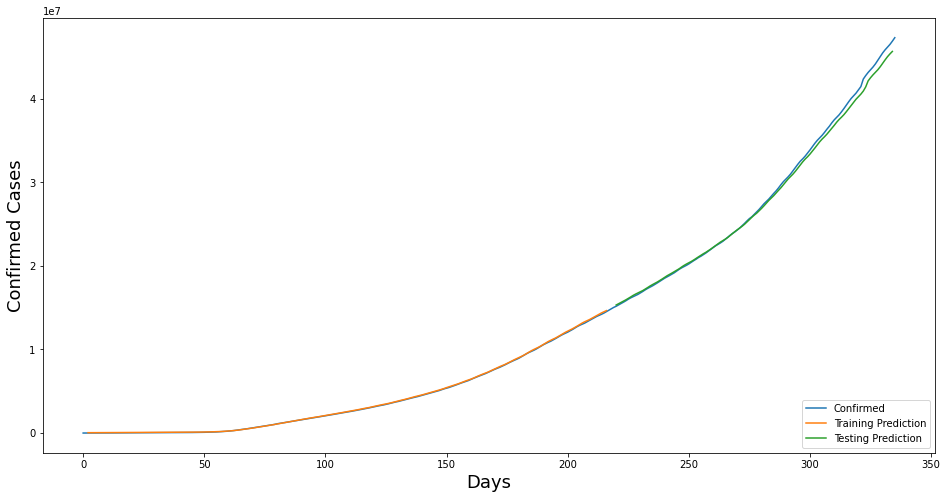

In [50]:
### Plotting 
# shift train predictions for plotting
look_back=2
trainPredictPlot = numpy.empty_like(confirmed)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict_c)+look_back, :] = train_predict_c
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(confirmed)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict_c)+(look_back*2)+1:len(confirmed)-1, :] = test_predict_c
# plot baseline and predictions
plt.figure(figsize=(16,8))
plt.xlabel('Days',fontsize=18)
plt.ylabel('Confirmed Cases',fontsize=18)
plt.plot(scaler.inverse_transform(confirmed))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Confirmed','Training Prediction','Testing Prediction'],loc='lower right')
plt.show()

In [51]:
print(scaler.inverse_transform(deaths))

[[3.00000000e+01]
 [2.48739219e+02]
 [6.86217658e+02]
 [1.06901129e+03]
 [1.77991375e+03]
 [3.11969147e+03]
 [3.17437628e+03]
 [4.21338757e+03]
 [5.36176847e+03]
 [6.61951898e+03]
 [9.43578643e+03]
 [1.11857002e+04]
 [1.29902987e+04]
 [1.49589517e+04]
 [1.68729199e+04]
 [1.91970241e+04]
 [2.15758131e+04]
 [2.43100533e+04]
 [2.72356904e+04]
 [2.99699306e+04]
 [3.01066426e+04]
 [3.70242704e+04]
 [4.11803156e+04]
 [4.50902792e+04]
 [4.79338890e+04]
 [5.06134444e+04]
 [5.44413808e+04]
 [5.75857571e+04]
 [6.10035574e+04]
 [6.11129270e+04]
 [6.67728043e+04]
 [6.70735707e+04]
 [7.14483551e+04]
 [7.36357473e+04]
 [7.53036338e+04]
 [7.64793571e+04]
 [7.80925588e+04]
 [7.99791846e+04]
 [8.14556743e+04]
 [8.38891482e+04]
 [8.59398283e+04]
 [8.85373566e+04]
 [9.11075424e+04]
 [9.41425491e+04]
 [9.69861589e+04]
 [1.03520993e+05]
 [1.08716050e+05]
 [1.16207868e+05]
 [1.25613654e+05]
 [1.33980429e+05]
 [1.47569603e+05]
 [1.59053412e+05]
 [1.76579892e+05]
 [1.95118041e+05]
 [2.17320072e+05]
 [2.420102

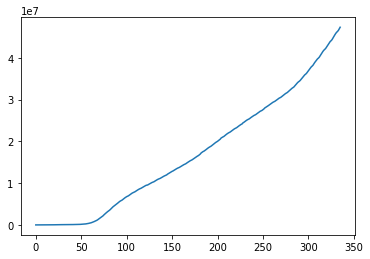

In [52]:
plt.plot(scaler.inverse_transform(deaths))

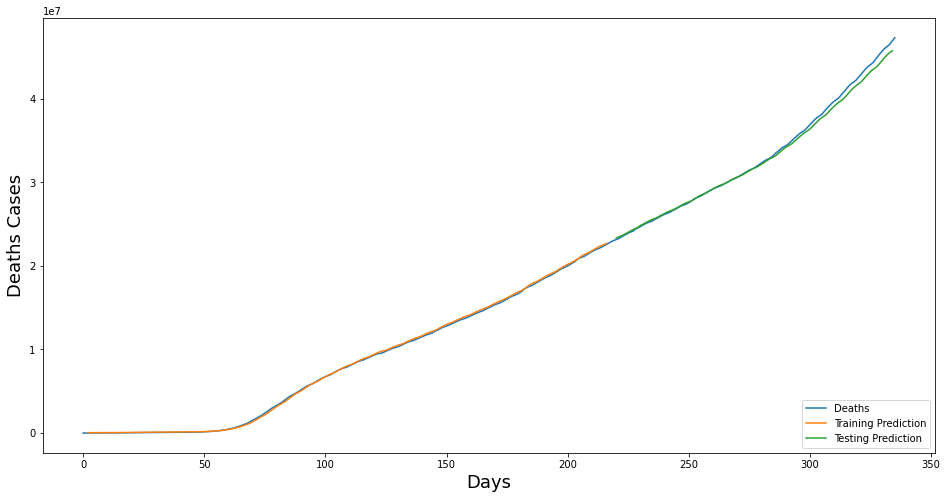

In [53]:
### Plotting 
# shift train predictions for plotting
look_back=2
trainPredictPlot = numpy.empty_like(deaths)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict_d)+look_back, :] = train_predict_d
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(deaths)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict_d)+(look_back*2)+1:len(deaths)-1, :] = test_predict_d
# plot baseline and predictions
plt.figure(figsize=(16,8))
plt.xlabel('Days',fontsize=18)
plt.ylabel('Deaths Cases',fontsize=18)
plt.plot(scaler.inverse_transform(deaths))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Deaths','Training Prediction','Testing Prediction'],loc='lower right')
plt.show()

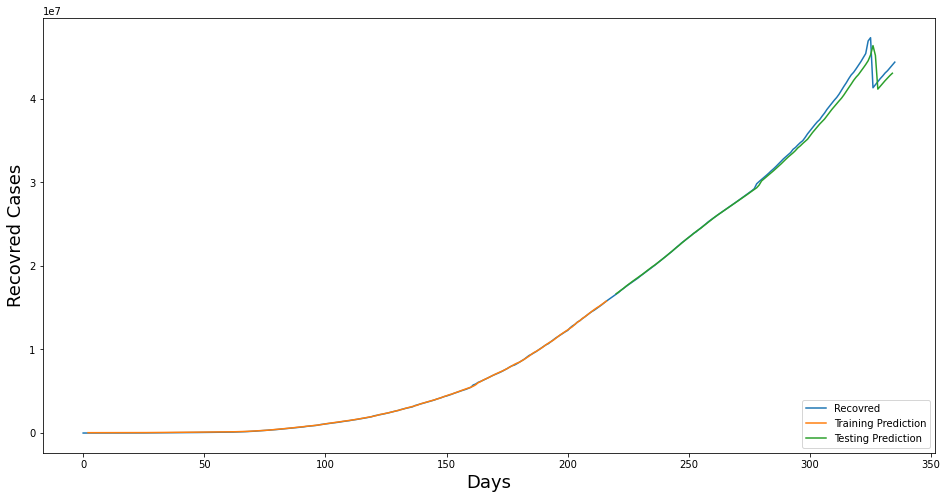

In [54]:
### Plotting 
# shift train predictions for plotting
look_back=2
trainPredictPlot = numpy.empty_like(recovred)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict_r)+look_back, :] = train_predict_r
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(recovred)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict_r)+(look_back*2)+1:len(recovred)-1, :] = test_predict_r
# plot baseline and predictions
plt.figure(figsize=(16,8))
plt.xlabel('Days',fontsize=18)
plt.ylabel('Recovred Cases',fontsize=18)
plt.plot(scaler.inverse_transform(recovred))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Recovred','Training Prediction','Testing Prediction'],loc='lower right')
plt.show()

In [58]:
x_input=test_data_c[116:].reshape(1,-1)
x_input.shape

(1, 2)

In [59]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [60]:
temp_input

[0.29735844199605155, 0.3]

In [78]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=2
i=0
while(i<30):
    
    if(len(temp_input)>2):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.24256988 0.24229218]
0 day output [[0.24202295]]
1 day input [0.24229218 0.24202295]
1 day output [[0.24176207]]
2 day input [0.24202295 0.24176207]
2 day output [[0.24150908]]
3 day input [0.24176207 0.24150908]
3 day output [[0.24126391]]
4 day input [0.24150908 0.24126391]
4 day output [[0.24102609]]
5 day input [0.24126391 0.24102609]
5 day output [[0.24079563]]
6 day input [0.24102609 0.24079563]
6 day output [[0.24057198]]
7 day input [0.24079563 0.24057198]
7 day output [[0.24035522]]
8 day input [0.24057198 0.24035522]
8 day output [[0.24014495]]
9 day input [0.24035522 0.24014495]
9 day output [[0.23994108]]
10 day input [0.24014495 0.23994108]
10 day output [[0.23974325]]
11 day input [0.23994108 0.23974325]
11 day output [[0.23955142]]
12 day input [0.23974325 0.23955142]
12 day output [[0.2393653]]
13 day input [0.23955142 0.23936529]
13 day output [[0.23918472]]
14 day input [0.23936529 0.23918472]
14 day output [[0.23900956]]
15 day input [0.23918472 0.2390

In [79]:
day_new=np.arange(1,3)
day_pred=np.arange(3,33)

In [80]:
import matplotlib.pyplot as plt

In [81]:
len(confirmed)

336

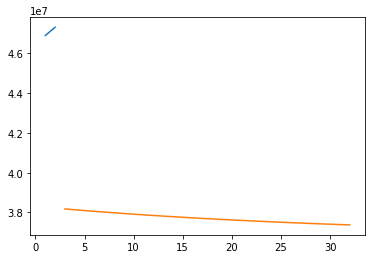

In [82]:
plt.plot(day_new,scaler.inverse_transform(confirmed[334:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

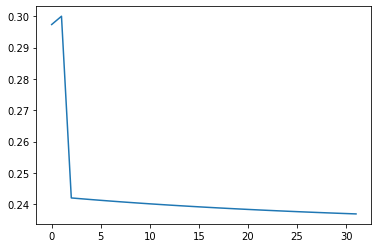

In [83]:
new_confirmed=confirmed.tolist()
new_confirmed.extend(lst_output)
plt.plot(new_confirmed[334:])

In [84]:
new_confirmed=scaler.inverse_transform(new_confirmed).tolist()

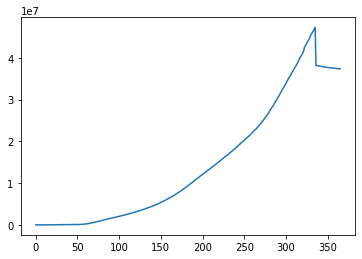

In [85]:
plt.plot(new_confirmed)